In [1]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, pathpatch_2d_to_3d
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as ss
import seaborn as sns

from utils import estimate_normals, normals_to_rgb
from plotting import set_axes_equal, set_defense_context

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
def add_coordinate_frame(ax):
    """Set RGB coordinate frame to axes.
    
    Parameters
    ----------
    ax : matplotlib.axes._subplots.Axes3DSubplot
        3-D axes subplot.
    
    Returns
    -------
    matplotlib.axes._subplots.Axes3DSubplot
        Axes with coordinate frame.
    """
    ax.quiver(-1.5, -1, -1.5, 0.75, 0, 0, color='r')
    ax.text(-0.7, -1, -1.5, s='$x$', color='r', fontweight='bold')
    ax.quiver(-1.5, -1, -1.5, 0, 0.75, 0, color='g')
    ax.text(-1.5, -0.2, -1.5, s='$y$', color='g', fontweight='bold')
    ax.quiver(-1.5, -1, -1.5, 0, 0, 0.75, color='b')
    ax.text(-1.5, -1, -0.7, s='$z$', color='b', fontweight='bold')
    ax.scatter(-1.5, -1, -1.5, s=10, color='k', depthshade=False)
    return ax

In [4]:
# constants
N = 7
edge_length = 2  # in cm
A = edge_length ** 2  # in cm2
target_area_origin = (-edge_length/2, -edge_length/2)
r = 2  # in cm
alpha = 2 * np.arcsin(edge_length/2/r)  # compute angle from secant
rectangle_kwargs = dict(width=edge_length, height=edge_length,
                        ec='k', fc='gray', lw=2, alpha=0.25)
scatter_kwargs = dict(s=10, color='k', depthshade=True)
quiver_kwargs = dict(normalize=True, lw=0.5, length=0.75, color='k')

# Plane

In [5]:
# point cloud
x = np.linspace(-edge_length/2, edge_length/2, N)
y = 0.0
z = np.linspace(-edge_length/2, edge_length/2, N)
Xt, Zt = np.meshgrid(x, z)
xt_pln = Xt.ravel()
yt_pln = np.zeros_like(xt_pln)
zt_pln = Zt.ravel()

In [6]:
# normals
nx_pln = 0
ny_pln = -1
nz_pln = 0

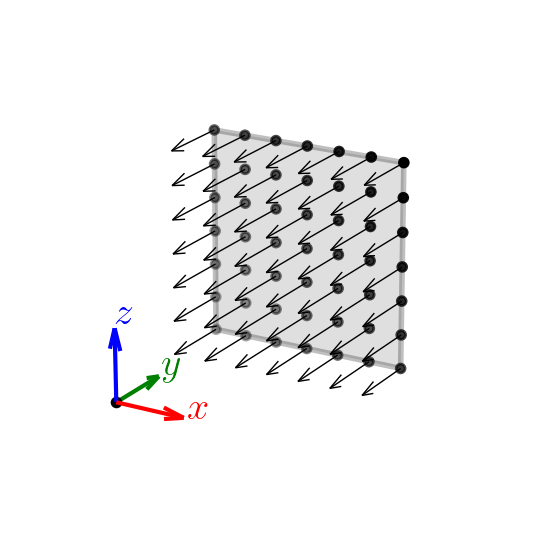

In [7]:
# visualize
with set_defense_context():
    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(projection ='3d')
    plane = Rectangle(target_area_origin, **rectangle_kwargs)
    ax.add_patch(plane)
    pathpatch_2d_to_3d(plane, z=y, zdir='y')
    ax.scatter(xt_pln, yt_pln, zt_pln, **scatter_kwargs)
    ax.quiver(xt_pln, yt_pln, zt_pln,
              nx_pln, ny_pln, nz_pln,
              **quiver_kwargs)
    ax = add_coordinate_frame(ax)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    ax.view_init(20, -60)
    fig.tight_layout()
    plt.show()

# Sphere

In [8]:
def cart2sph(x, y, z):
    """Return spherical given Cartesain coordinates."""
    r = np.sqrt(x ** 2 + y ** 2 + z ** 2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi


def sph2cart(r, theta, phi):
    """Return Cartesian given Spherical coordinates."""
    x = r * np.cos(phi) * np.sin(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z


def sph_normals(r, theta, phi):
    """Return unit vector field components normal to spherical
    surface."""
    nx = r ** 2 * np.cos(phi) * np.sin(theta) ** 2 
    ny = r ** 2 * np.sin(phi) * np.sin(theta) ** 2
    nz = r ** 2 * np.cos(theta) * np.sin(theta)
    return nx, ny, nz

In [9]:
# point cloud
theta = np.linspace(np.pi/2 - alpha/2, np.pi/2 + alpha/2, N)
phi = np.linspace(np.pi-alpha/2, np.pi+alpha/2, N)
Theta, Phi = np.meshgrid(theta, phi)
yt_sph, xt_sph, zt_sph = sph2cart(r, Theta.ravel(), Phi.ravel())
yt_sph -= yt_sph.min()

In [10]:
# normals
ny_sph, nx_sph, nz_sph = sph_normals(r, Theta.ravel(), Phi.ravel())

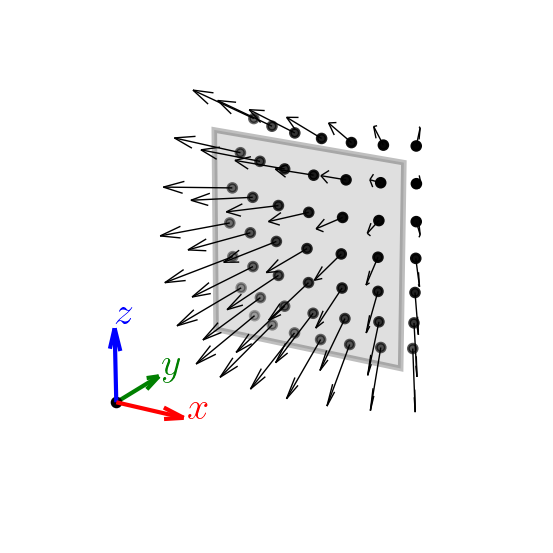

In [11]:
# visualize
with set_defense_context():
    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(projection ='3d')
    plane = Rectangle(target_area_origin, **rectangle_kwargs)
    ax.add_patch(plane)
    pathpatch_2d_to_3d(plane, z=y, zdir='y')
    ax.scatter(xt_sph, yt_sph, zt_sph,
               **scatter_kwargs)
    ax.quiver(xt_sph, yt_sph, zt_sph,
              nx_sph, ny_sph, nz_sph,
              **quiver_kwargs)
    ax = add_coordinate_frame(ax)
    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    ax.view_init(20, -60)
    fig.tight_layout()
    plt.show()

# Cylinder

In [12]:
def cart2cyl(x, y, z):
    """Return Cylndrical given Cartesain coordinates."""
    r = np.sqrt(x ** 2 + y ** 2)
    theta = np.arcsin(y / r)
    return r, theta, z


def cyl2cart(r, theta, z):
    """Return Cartesian given Cylndrical coordinates."""
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, z


def cyl_normals(r, theta, z):
    """Return unit vector field components normal to cylindrical
    surface."""
    nx = np.cos(theta)
    ny = np.sin(theta)
    nz = np.zeros_like(z)
    return nx, ny, nz

In [13]:
# point cloud
theta = np.linspace(np.pi/2-alpha/2, np.pi/2+alpha/2, N)
Theta, Zt = np.meshgrid(-theta, z)
xt_cyl, yt_cyl, zt_cyl = cyl2cart(r, Theta.ravel(), Zt.ravel())
yt_cyl -= yt_cyl.min()

In [14]:
# normals
nx_cyl, ny_cyl, nz_cyl = cyl_normals(r, Theta.ravel(), zt_cyl)

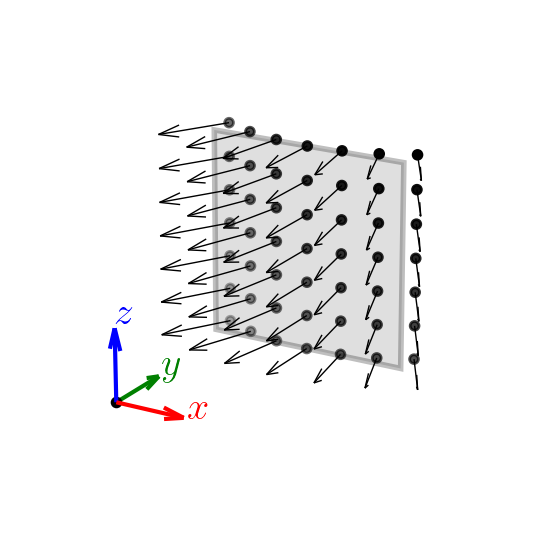

In [15]:
# visualize
with set_defense_context():
    fig = plt.figure(figsize=(3, 3))
    ax = plt.axes(projection ='3d')
    plane = Rectangle(target_area_origin, **rectangle_kwargs)
    ax.add_patch(plane)
    pathpatch_2d_to_3d(plane, z=y, zdir='y')
    ax.scatter(xt_cyl, yt_cyl, zt_cyl,
               **scatter_kwargs)
    ax.quiver(xt_cyl, yt_cyl, zt_cyl,
              nx_cyl, ny_cyl, nz_cyl,
              **quiver_kwargs)
    ax = add_coordinate_frame(ax)

    ax.set_box_aspect([1, 1, 1])
    ax = set_axes_equal(ax)
    ax.set_axis_off()
    ax.view_init(20, -60)
    fig.tight_layout()
    plt.show()